<h1 style="text-align:center"><strong>Price Elasticity of Demand</strong></h1>

<h2><strong>Problem Statement</strong></h2>


<pre><code>ABC Electronics is a company that produces and sells a variety of electronics goods, including speakers, laptops, and televisions. The company is facing a major challenge in managing their inventory. Despite their efforts to reduce costs and increase sales, they have noticed a decline in sales for a particular category of products. They believe that the decline in sales is due to a change in consumer behaviour, specifically in the way that consumers are responding to changes in price. In order to address this issue, ABC Electronics has asked us to perform a data science project on the Price Elasticity of Demand for their products. This project will be developed with stakeholder"s needs in mind and potentially deliver significant value to sales, marketing, and regulatory managers, by providing data-driven insights into consumer behaviour and product demand.</code></pre>


In [1]:
# IMPORTING PACKAGES
# ------------------------------------------------------
import pandas as pd
import numpy as np
import os
import re
import warnings

# VISUALIZATION
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 0
pd.options.display.max_colwidth =10

# CONFIGURATIONS
# ------------------------------------------------------
warnings.filterwarnings("ignore")

In [2]:
os.chdir("data")

In [3]:
df = pd.read_csv("CleanedData.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41869 entries, 0 to 41868
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              41869 non-null  object 
 1   Name            41869 non-null  object 
 2   Brand           41869 non-null  object 
 3   Description     41869 non-null  object 
 4   Category_name   41869 non-null  object 
 5   Merchant        41869 non-null  object 
 6   Actual_price    41869 non-null  float64
 7   Discount_price  41869 non-null  float64
 8   isSale          41869 non-null  object 
 9   Discount_per    41869 non-null  float64
 10  Imp_count       41869 non-null  int64  
 11  Day             41869 non-null  int64  
 12  Month           41869 non-null  int64  
 13  Year            41869 non-null  int64  
 14  Week            41869 non-null  int64  
 15  Month_Name      41869 non-null  object 
 16  Day_Name        41869 non-null  object 
 17  Date            41869 non-null 

In [5]:
df.describe()

,Actual_price,Discount_price,Discount_per,Imp_count,Day,Month,Year,Week
count,41869....,41869....,41869....,41869....,41869....,41869....,41869....,41869....
mean,535.48...,519.08...,1.747614,11.115742,15.766223,6.946237,2017.1...,28.305214
std,1134.8...,1107.4...,7.705244,21.487370,9.581026,2.926866,0.486051,12.759721
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2014.0...,1.000000
25%,84.950000,82.990000,0.000000,2.000000,7.000000,5.000000,2017.0...,19.000000
50%,199.00...,198.00...,0.000000,6.000000,17.000000,7.000000,2017.0...,30.000000
75%,499.99...,499.95...,0.000000,12.000000,25.000000,9.000000,2017.0...,37.000000
max,26871....,26871....,85.870000,198.00...,31.000000,12.000000,2018.0...,53.000000


In [6]:
#All Numerical Columns
numerics = ['Actual_price', 'Discount_price', 'Discount_per',"Imp_count","Week","Month","Year"]

In [7]:
df.corr()

,Actual_price,Discount_price,Discount_per,Imp_count,Day,Month,Year,Week
Actual_price,1.000000,0.992367,0.080506,-0.014218,0.019281,-0.019903,0.067744,-0.017774
Discount_price,0.992367,1.000000,0.011356,-0.010673,0.017982,-0.023010,0.064426,-0.020998
Discount_per,0.080506,0.011356,1.000000,-0.006855,0.030758,0.052898,0.042482,0.055333
Imp_count,-0.014218,-0.010673,-0.006855,1.000000,0.023416,-0.033238,0.051322,-0.031175
Day,0.019281,0.017982,0.030758,0.023416,1.000000,-0.053343,-0.002466,0.052853
Month,-0.019903,-0.023010,0.052898,-0.033238,-0.053343,1.000000,-0.433433,0.993907
Year,0.067744,0.064426,0.042482,0.051322,-0.002466,-0.433433,1.000000,-0.433692
Week,-0.017774,-0.020998,0.055333,-0.031175,0.052853,0.993907,-0.433692,1.000000


<AxesSubplot:>

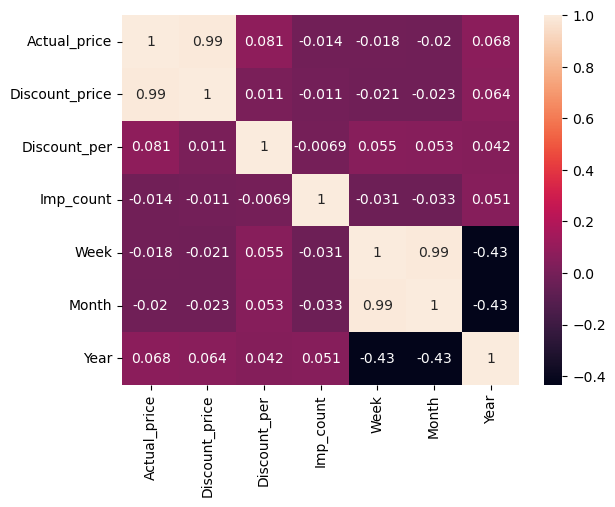

In [8]:
sns.heatmap(df[numerics].corr(), annot=True)

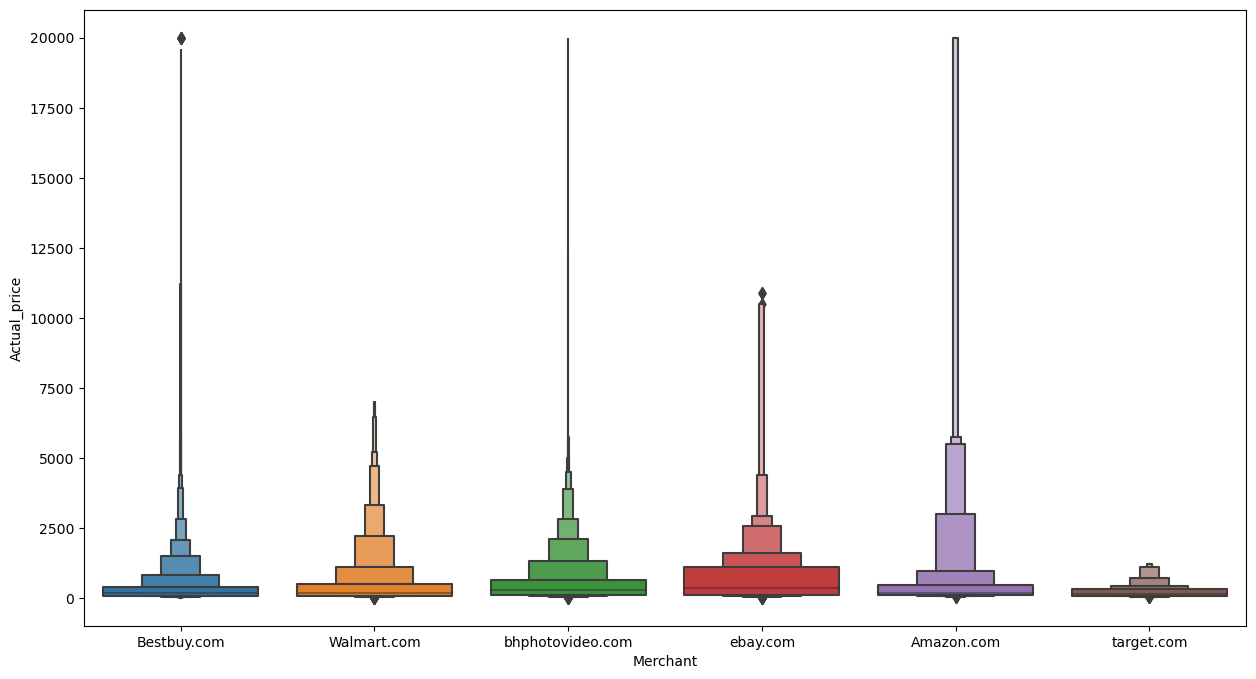

In [9]:
Selected_merchant = df.loc[df.Merchant.isin(df['Merchant'].value_counts()[0:6].index)]
plt.figure(figsize=(15,8))
ax = sns.boxenplot(x=Selected_merchant['Merchant'],y=Selected_merchant['Actual_price'])

❇️ Bestbuy, Amazon sells more expensive products, while Target sells products at a lower price point based on their price.

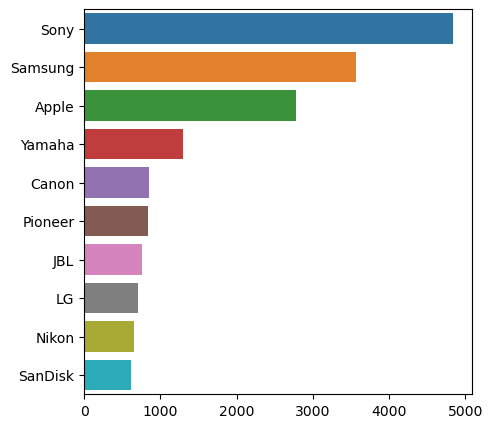

In [10]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x = df['Brand'].value_counts().values[0:10],y = df['Brand'].value_counts().index[0:10])
# Brand Distribution

❇️ The largest share of the market is held by Sony and Samsung, with Apple and other companies following behind.

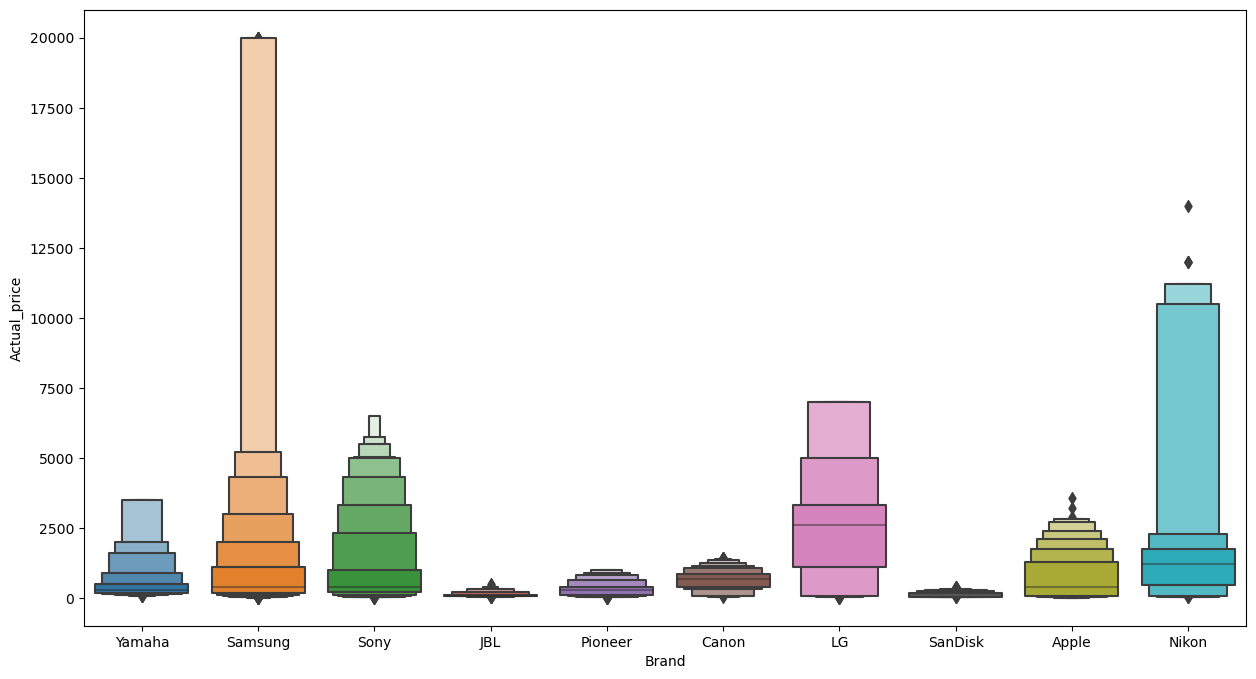

In [11]:
Selected_brand = df.loc[df.Brand.isin(df['Brand'].value_counts()[0:10].index)]
Selected_brand

plt.figure(figsize=(15,8))
ax = sns.boxenplot(x=Selected_brand['Brand'],y=Selected_brand['Actual_price'],scale="linear")

❇️ Note :
1. LG produces mainly expensive, high-end products, while Samsung and Nikon make both simple and high-end products.
2. Apple and Sony have a specific limit on the prices of their products.

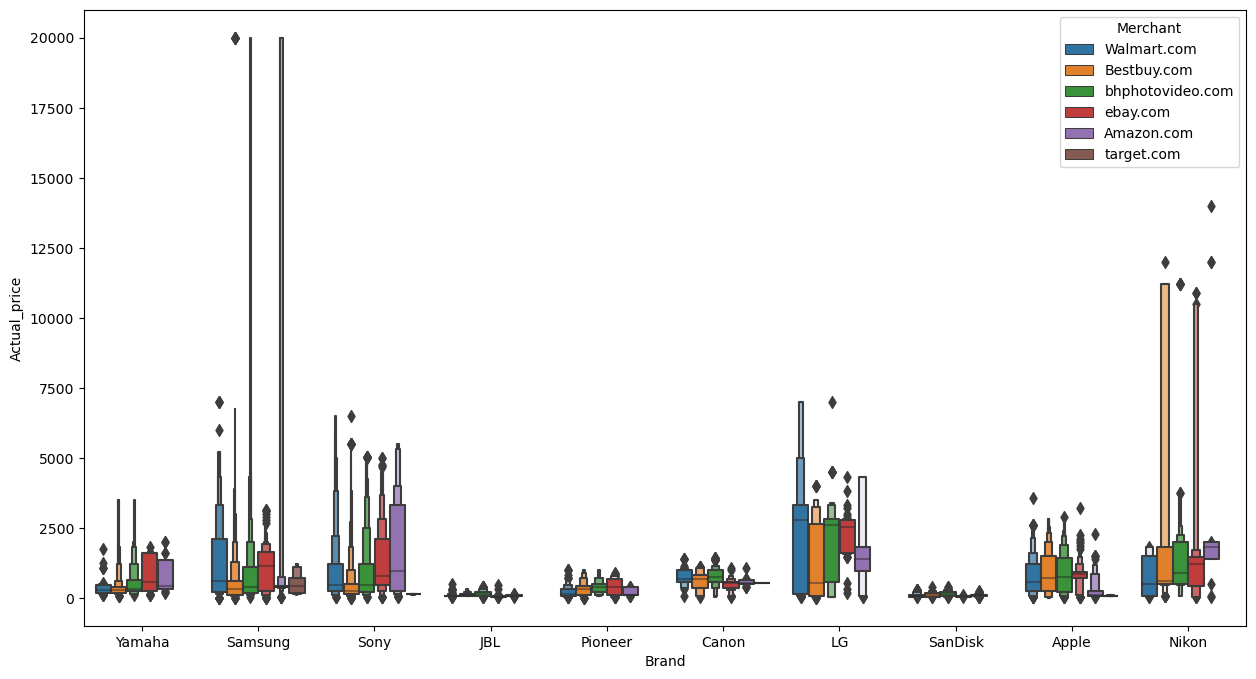

In [12]:
Selected_brand_merchant = Selected_brand[Selected_brand.Merchant.isin(Selected_merchant.Merchant.unique())]
# Selected_brand_merchant

plt.figure(figsize=(15,8))
ax = sns.boxenplot(x=Selected_brand_merchant['Brand'],y=Selected_brand_merchant['Actual_price'],hue=Selected_brand_merchant['Merchant'])

❇️ Note :
1. Samsung, Sony, and Apple products are widely available and sold by many different vendors.
2. LG prodcusts are mainly sold by Walmart and Amazon.
3. Nikon on the other hand is mainly sold on Bestbuy and Ebay.

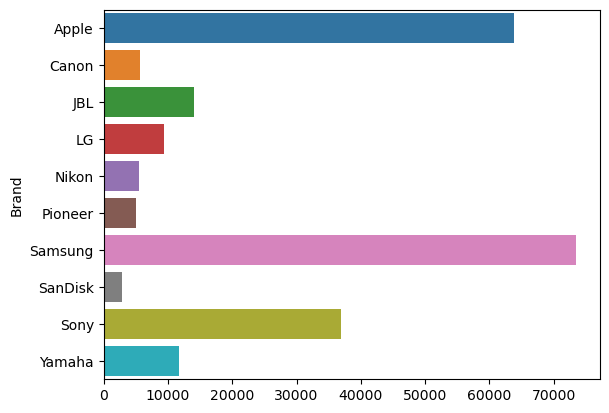

In [13]:
ax =sns.barplot(y=Selected_brand.groupby('Brand').sum()['Imp_count'].index,x=Selected_brand.groupby('Brand').sum()['Imp_count'].values)

❇️ Sony, Samsung, and Apple are among the most popular and best-selling products in the market.

<AxesSubplot:title={'center':'Year wise distribution'}, xlabel='Year', ylabel='Imp_count'>

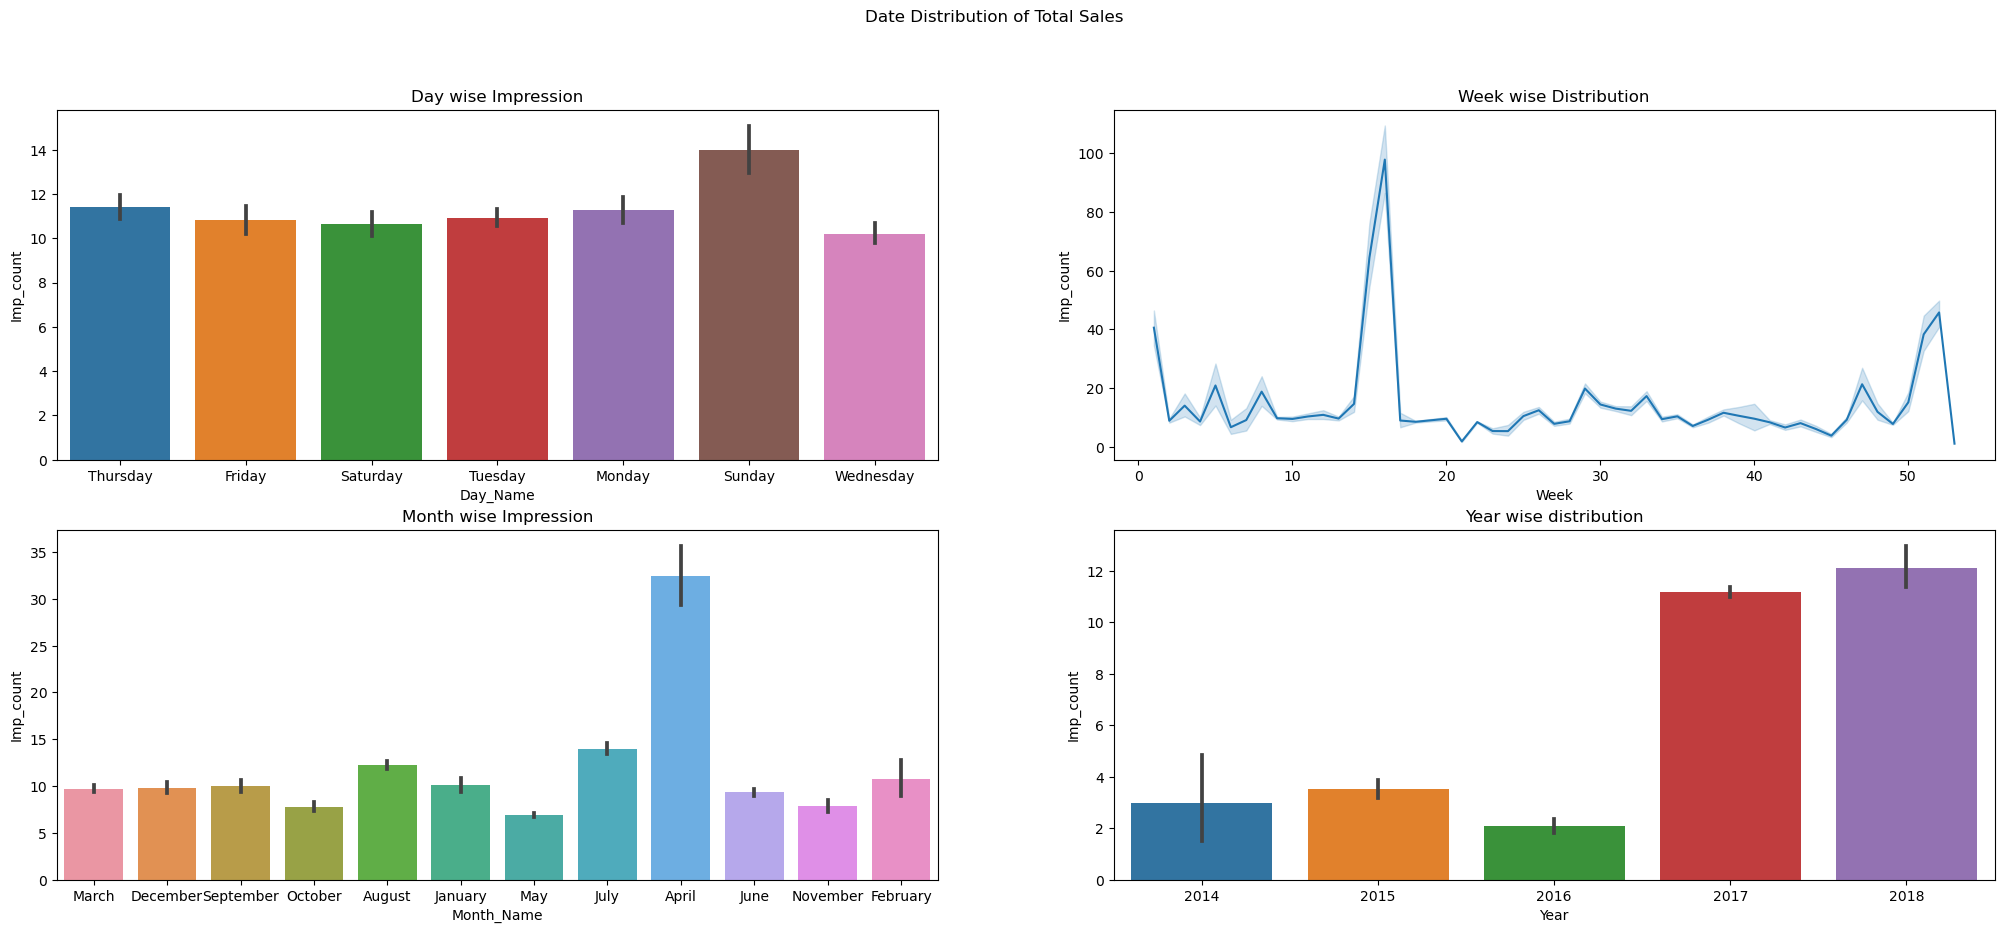

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(25, 10))
fig.suptitle('Date Distribution of Total Sales')
axes[0,0].set_title('Day wise Impression')
axes[0,1].set_title('Week wise Distribution')
axes[1,0].set_title('Month wise Impression')
axes[1,1].set_title('Year wise distribution')



sns.barplot(ax=axes[0,0],x = df['Day_Name'], y= df['Imp_count'])
sns.lineplot(ax=axes[0,1],x = df['Week'], y= df['Imp_count'])
sns.barplot(ax=axes[1,0],x = df['Month_Name'], y= df['Imp_count'])
sns.barplot(ax=axes[1,1],x = df['Year'], y= df['Imp_count'])

❇️ Note :
1. On Sunday people as buying maximum items
2. In week chart, ther is spike in around 15th-17th week and at end of year.
3. In 2017, 2018 there is increase in electornics sale market share.

#Impresations vs Discount percentage


<AxesSubplot:xlabel='Discount_per', ylabel='Imp_count'>

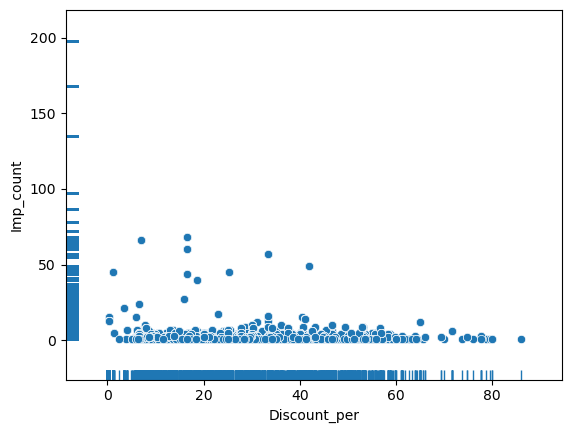

In [15]:
sns.scatterplot(x=df[(df['Discount_per']>0)]['Discount_per'], y=df['Imp_count'])
sns.rugplot(x=df['Discount_per'], y=df['Imp_count'])

<h2><strong>Univariate analysis :</strong></h2>

1️⃣ Actual_price

In [16]:
def uni_var(df):
    print(df.describe())
    fig,axs=plt.subplots(ncols=2,figsize=(10,5))
    sns.distplot(df,ax=axs[0])
    sns.boxenplot(df,ax=axs[1])

count    41869....
mean     535.48...
std      1134.8...
min       1.000000
25%      84.950000
50%      199.00...
75%      499.99...
max      26871....
Name: Actual_price, dtype: float64


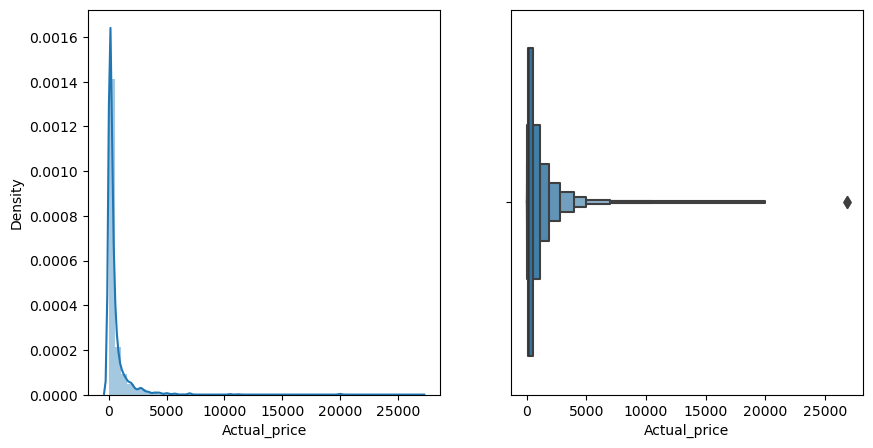

In [17]:
dd1 = df["Actual_price"]
uni_var(dd1)

❇️ Most products are priced between 85USD to 500USD

2️⃣ Discount_per

count    2747.0...
mean     26.636640
std      15.556967
min       0.330000
25%      15.910000
50%      25.040000
75%      37.545000
max      85.870000
Name: Discount_per, dtype: float64


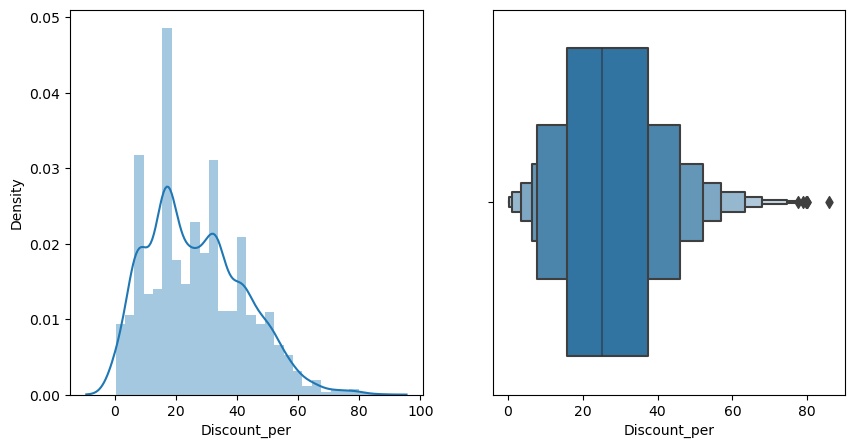

In [18]:
dd2 = df[(df['Discount_per']>0)]['Discount_per']
uni_var(dd2)

❇️ Maximum discount is given between approx. 15% to 37%.

<AxesSubplot:xlabel='Discount_per', ylabel='Density'>

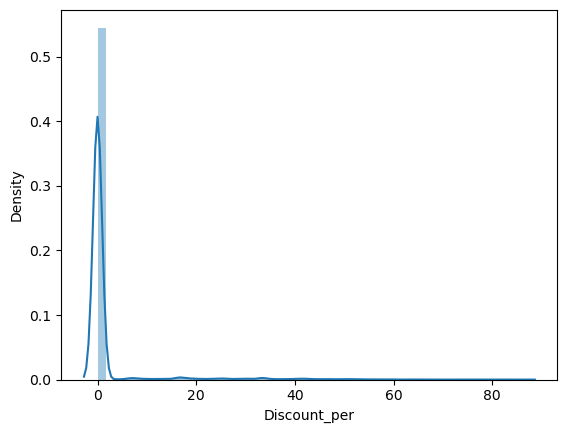

In [19]:
sns.distplot(df["Discount_per"])

3️⃣ Discount_price

count    41869....
mean     519.08...
std      1107.4...
min       1.000000
25%      82.990000
50%      198.00...
75%      499.95...
max      26871....
Name: Discount_price, dtype: float64


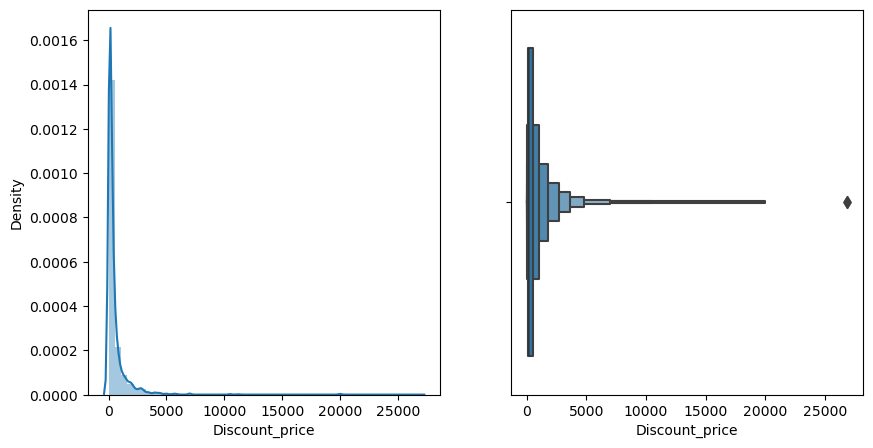

In [20]:
dd3 = df["Discount_price"]
uni_var(dd3)